In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import matplotlib.pyplot as plt
from dataloaders import MnistSpikesDataloader
from preprocessing import apply_difference_of_gaussians_filter, apply_latency_encoding
from spiking import convert_to_spikes
from visualization import ImagesVisualization, SpikesVisualization

plt.rcParams['image.cmap'] = 'Grays'

In [3]:
dataloader = MnistSpikesDataloader("../data/mnist-subset", 'train', image_shape=(16, 16))

image.shape = torch.Size([16, 16]), label = tensor(9)


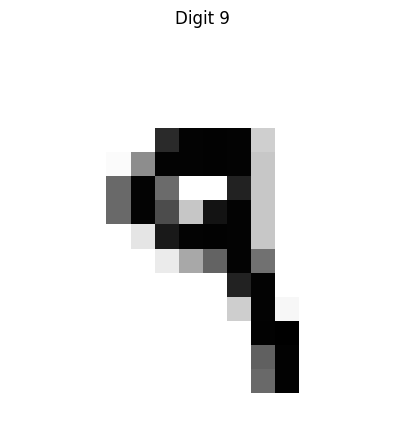

In [4]:
data_point_idx = 8
image = dataloader.inputs[data_point_idx]
label = dataloader.outputs[data_point_idx]
print(f"{image.shape = }, {label = }")
ImagesVisualization.plot_images(image, title=f"Digit {label}")

dog_image.shape = torch.Size([2, 16, 16])


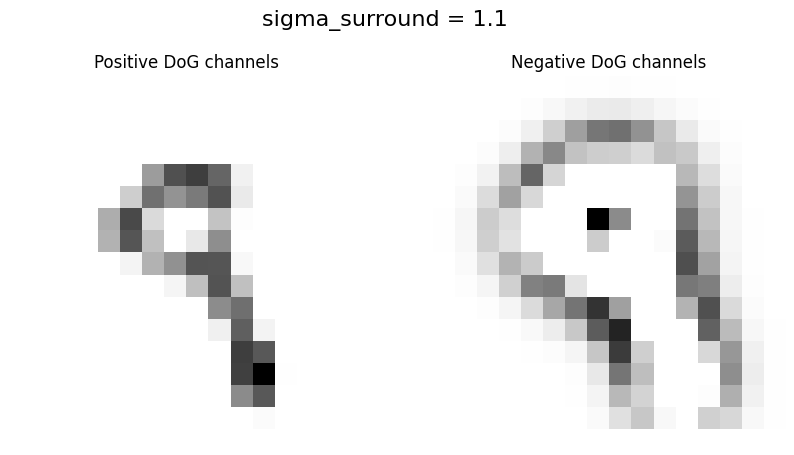

dog_image.shape = torch.Size([2, 16, 16])


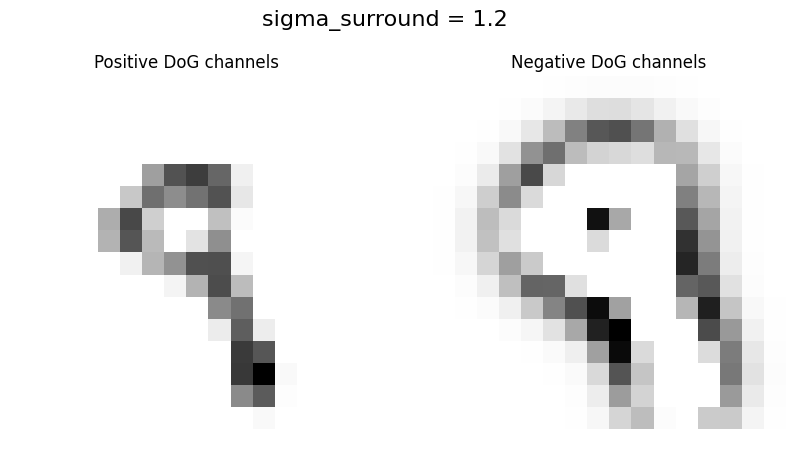

dog_image.shape = torch.Size([2, 16, 16])


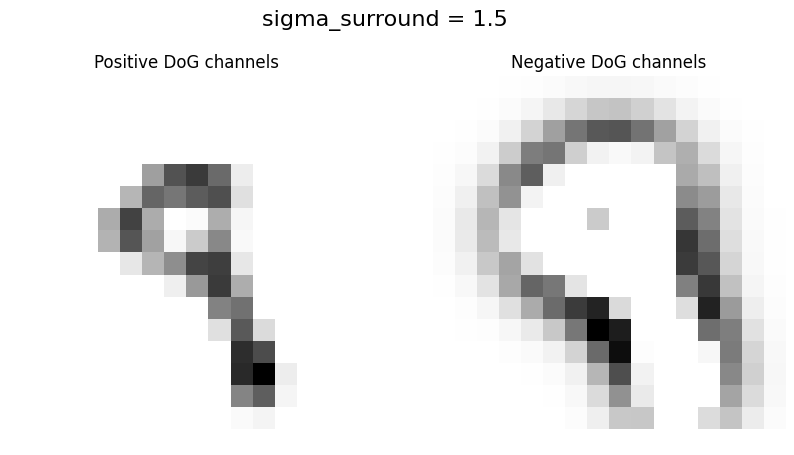

dog_image.shape = torch.Size([2, 16, 16])


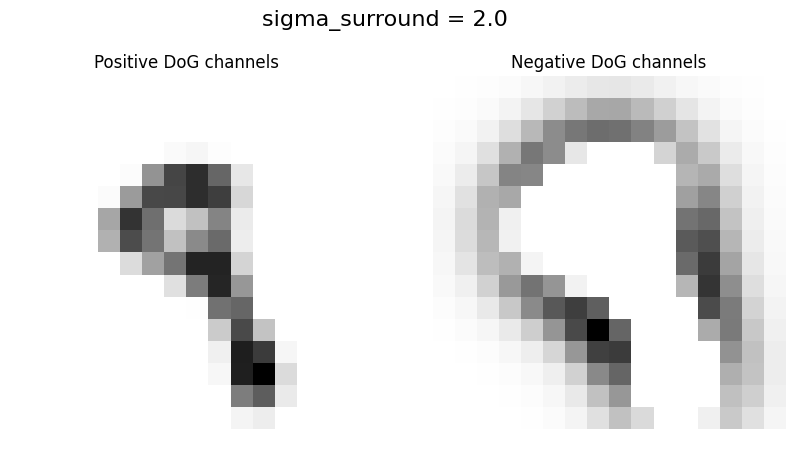

dog_image.shape = torch.Size([2, 16, 16])


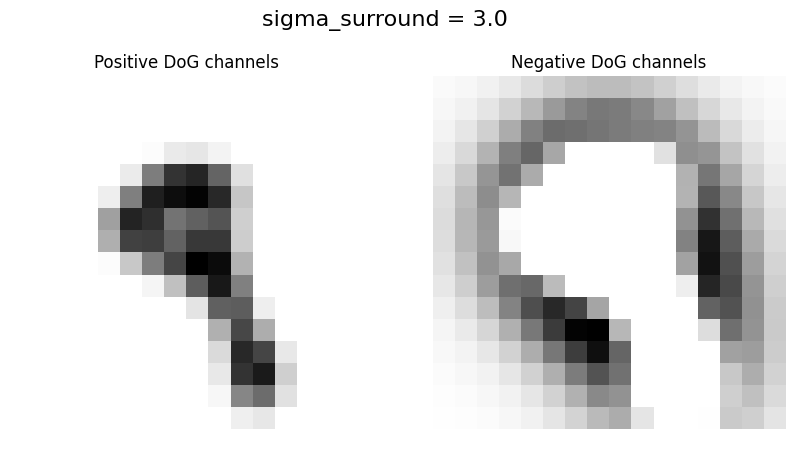

In [28]:
for sigma_surround in [1.1, 1.2, 1.5, 2.0, 3.0]:
    dog_image = apply_difference_of_gaussians_filter(image, sigma_surround=sigma_surround)
    print(f"{dog_image.shape = }")
    ImagesVisualization.plot_images(*dog_image, title=f"{sigma_surround = }", titles=["Positive DoG channels", "Negative DoG channels"], ncols=2)

torch.sum(latency_coded_dog_image == float('inf')) = tensor(256)


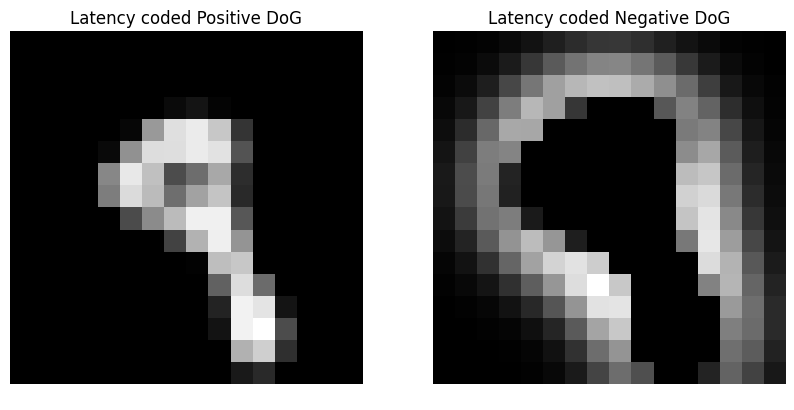

In [27]:
latency_coded_dog_image = apply_latency_encoding(dog_image)
print(f"{torch.sum(latency_coded_dog_image == float('inf')) = }")
clipped_latency_dog_image = torch.clamp(latency_coded_dog_image, max=1.0)
ImagesVisualization.plot_images(*clipped_latency_dog_image, titles=["Latency coded Positive DoG", "Latency coded Negative DoG"], ncols=2)

len(spikes) = 254


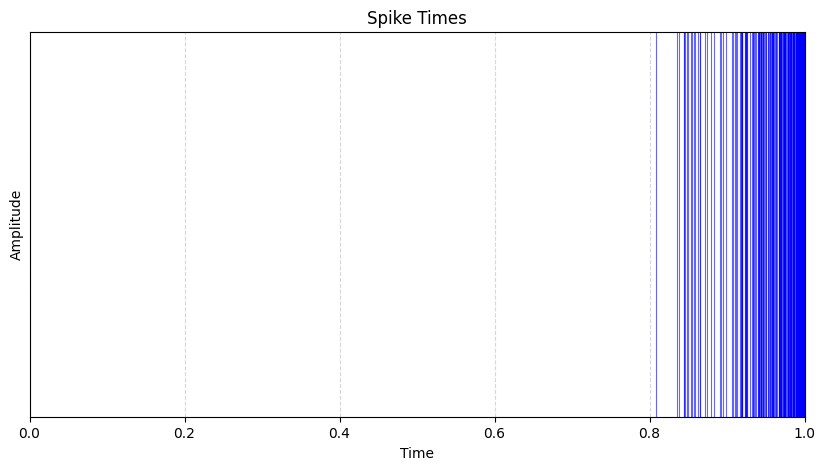

In [19]:
spikes = convert_to_spikes(latency_coded_dog_image)
print(f"{len(spikes) = }")
SpikesVisualization.plot_spikes(spikes, title="Spike Times")

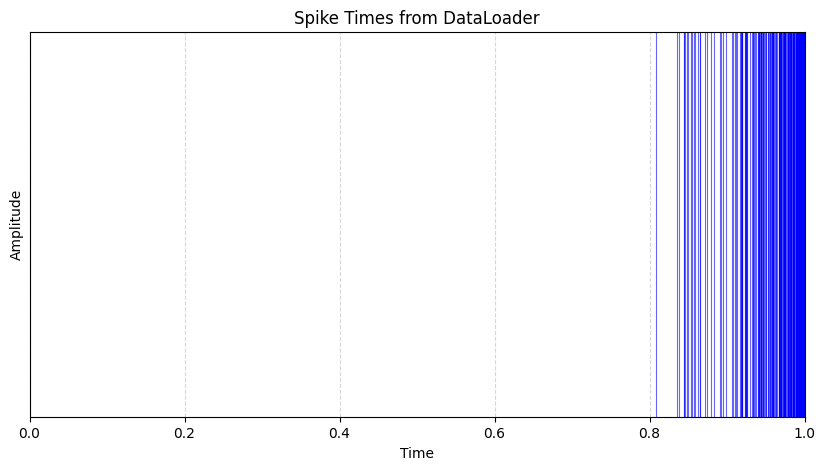

In [20]:
spikes = dataloader[data_point_idx][0]
SpikesVisualization.plot_spikes(spikes, title="Spike Times from DataLoader")

In [21]:
num_classes = 10
num_pixels_each = [0 for _ in range(num_classes)]
num_labels_each = [0 for _ in range(num_classes)]

for spikes, label, _ in dataloader.iterate():
    num_pixels_each[label] += len(spikes)
    num_labels_each[label] += 1

for i in range(num_classes):
    num_pixels_each[i] /= num_labels_each[i]

for i in range(num_classes):
    print(f"num_pixels_each[{i}] = {num_pixels_each[i]}")

mean_pixels_all = 0
for num in num_pixels_each:
    mean_pixels_all += num
mean_pixels_all /= len(num_pixels_each)
print(f"{mean_pixels_all = }")

num_pixels_each[0] = 255.35
num_pixels_each[1] = 237.48333333333332
num_pixels_each[2] = 255.11666666666667
num_pixels_each[3] = 254.85
num_pixels_each[4] = 255.26666666666668
num_pixels_each[5] = 254.46666666666667
num_pixels_each[6] = 254.26666666666668
num_pixels_each[7] = 254.3
num_pixels_each[8] = 254.06666666666666
num_pixels_each[9] = 254.71666666666667
mean_pixels_all = 252.98833333333337
